In [54]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import time

In [55]:
# Download and load the training set
train_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=True, download=False)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test set
test_dataset = datasets.MNIST(root='/home/zach/intelligent_machines/data', train=False, download=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

print(train_images.shape)

(60000, 28, 28)


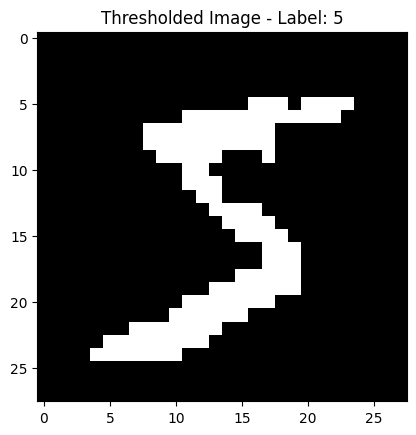

[[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]]


In [10]:
threshold_value = 100  # Pixel intensity threshold (0-255)
train_images = np.where(train_images > threshold_value, 1.0, -1.0)
test_images = np.where(test_images > threshold_value, 1.0, -1.0)

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

print(train_images[0][10:20, 10:20])


In [ ]:
shape = train_images[0].shape
N = shape[0] * shape[1]
W = np.zeros((N,N))
print(W.shape)


(784, 784)
784


In [44]:

for index in range(1):
    image = train_images[index]

    for i in range(N):
        row_i = i // shape[1]  # Compute row index from i
        col_i = i % shape[1]   # Compute col index from i
        xi = image[row_i, col_i]  # Get pixel value at (row_i, col_i)
        
        for j in range(N):
            if i == j:
                continue

            row_j = j // shape[1]
            col_j = j % shape[1]
            xj = image[row_j, col_j]
            
            W[i, j] += xi*xj


In [45]:


image = train_images[0].reshape(-1,1)
print(image.shape)

inner_product = image @ image.T

inner_product[np.eye(N, dtype=bool)] = 0

print(inner_product.shape)
print(inner_product[20:25, 20:25])
print(W[20:25, 20:25])
print(np.sum(inner_product - W))



(784, 1)
(784, 784)
[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]
[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]
0.0


In [ ]:
num = 10 
batch = train_images[:num,:,:].reshape((num,-1,1))
print(batch.shape)

weight = batch @ batch.transpose(0, 2, 1)

print(batch.transpose(0, 2, 1).shape)
print(weight.shape)

weight_vec = weight[0]
print(weight_vec.shape)
print(np.eye(N, dtype=bool).shape)
weight_vec[np.eye(N, dtype=bool)] = 0

print(np.sum(inner_product - weight_vec))




(10, 784, 1)
(10, 1, 784)
(10, 784, 784)
(784, 784)
(784, 784)
0.0


In [53]:
num = 1000
batch = train_images[:num,:,:].reshape((num,-1,1))

weight = batch @ batch.transpose(0, 2, 1)
print(weight.shape)

weight = np.sum(weight, axis=0)
weight[np.eye(N, dtype=bool)] = 0

print(weight.shape)




(1000, 784, 784)
(784, 784)


In [61]:

selected_images = train_images[:10000]
# Test different batch sizes
batch_sizes = [100, 1000, 10000, 30000]
# batch_sizes = [1, 10, 100, 1000, 10000]

times = []

for batch_size in batch_sizes:
    num_iter = selected_images.shape[0] // batch_size

    start = time.time()
    
    # Initialize weight matrix
    weight = np.zeros((N, N))
    
    # Process in batches
    for i in range(0, num_iter):
        batch = train_images[i:i + batch_size].reshape(batch_size, -1, 1)
        partial_weight = np.matmul(batch, batch.transpose(0, 2, 1))
        weight += np.sum(partial_weight, axis=0)
    
    # Zero out the diagonal
    weight[np.eye(N, dtype=bool)] = 0
    
    end = time.time()
    times.append(end - start)

    print(f"Batch Size {batch_size}: {end - start:.4f} seconds")

# Plot performance
plt.plot(batch_sizes, times, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.title('Batch Size vs. Computation Time')
plt.grid(True)
plt.show()

Batch Size 100: 15.8588 seconds
Batch Size 1000: 14.8044 seconds


: 

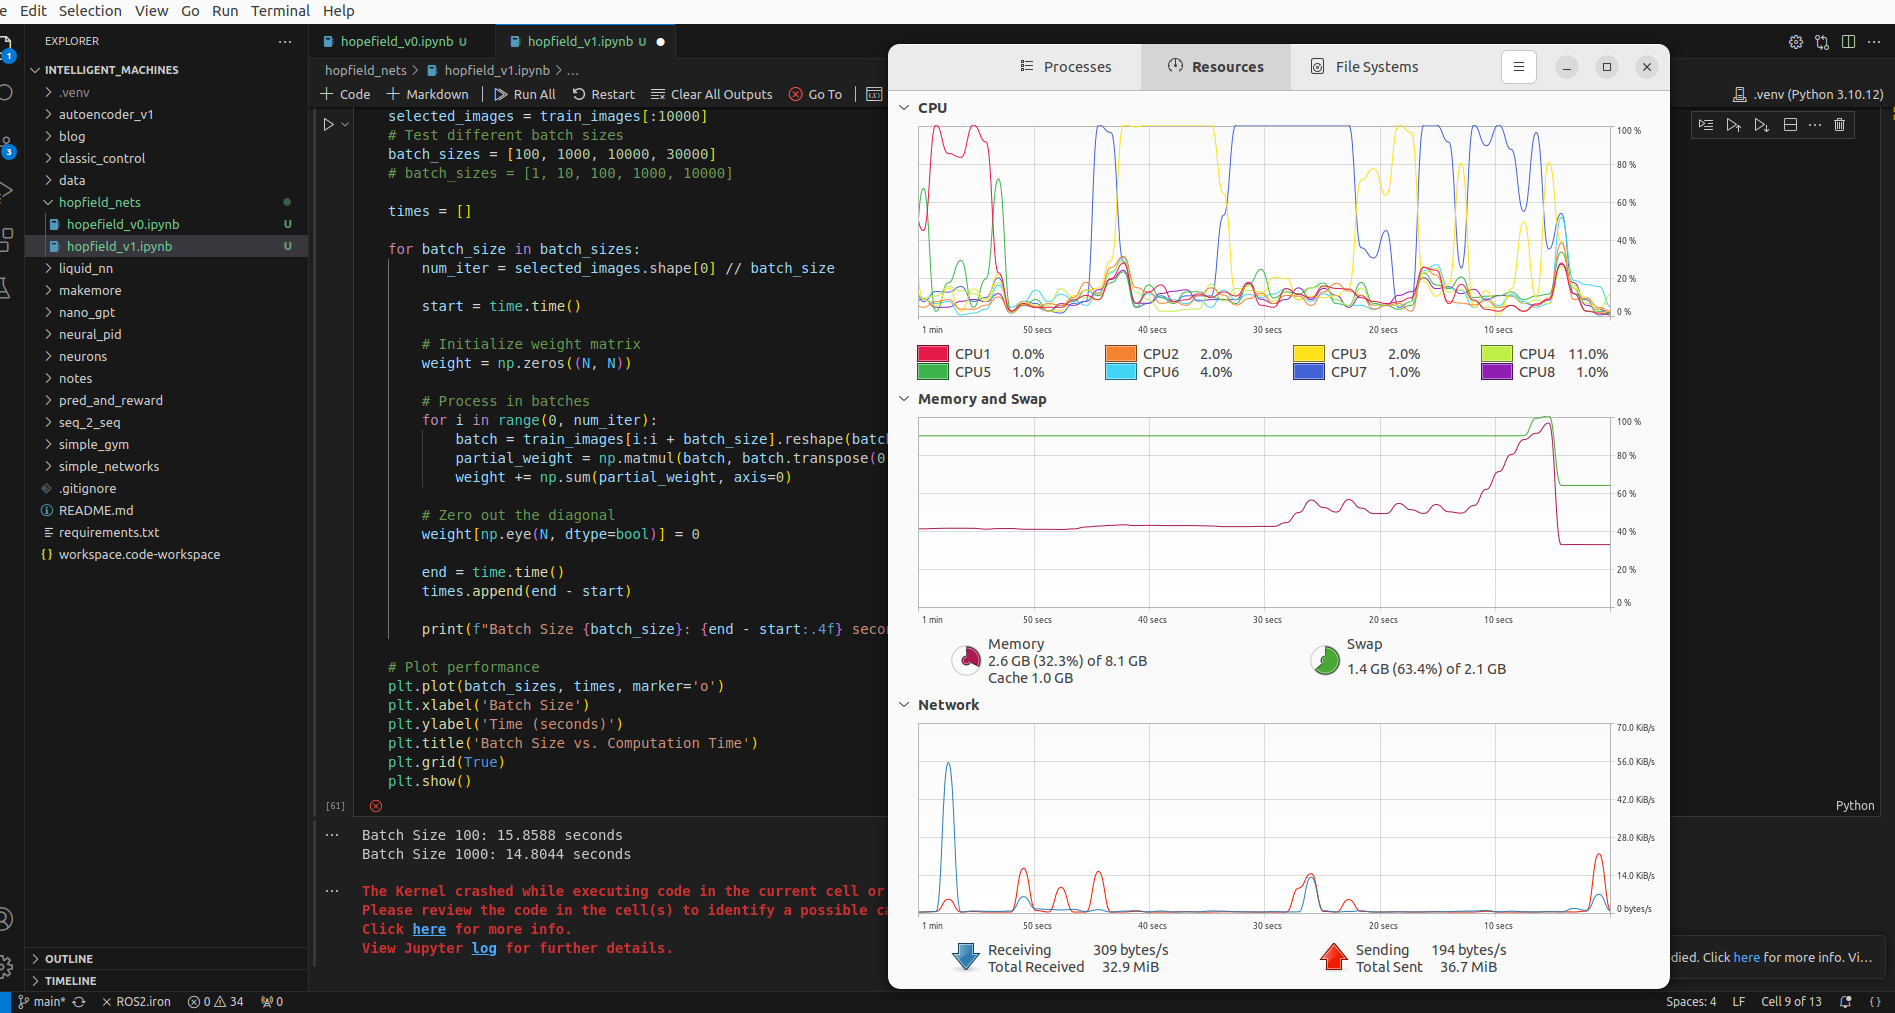

In [ ]:

selected_images = train_images[:10000]
# Test different batch sizes
batch_sizes = 2000


num_iter = selected_images.shape[0] // batch_size

start = time.time()

# Initialize weight matrix
weight = np.zeros((N, N))

# Process in batches
for i in range(0, num_iter):
    batch = train_images[i:i + batch_size].reshape(batch_size, -1, 1)
    partial_weight = np.matmul(batch, batch.transpose(0, 2, 1))
    weight += np.sum(partial_weight, axis=0)

# Zero out the diagonal
weight[np.eye(N, dtype=bool)] = 0


In [31]:
# Simulate a (N, 728, 1) matrix
N = 100  # Number of samples
X = np.random.rand(N, 728, 1)  # Random data with shape (N, 728, 1)

# Compute outer product: (N, 728, 1) x (N, 1, 728)
outer_product = np.matmul(X, X.transpose(0, 2, 1))  # Result: (N, 728, 728)

print(outer_product.shape)  # (N, 728, 728)

(100, 728, 728)


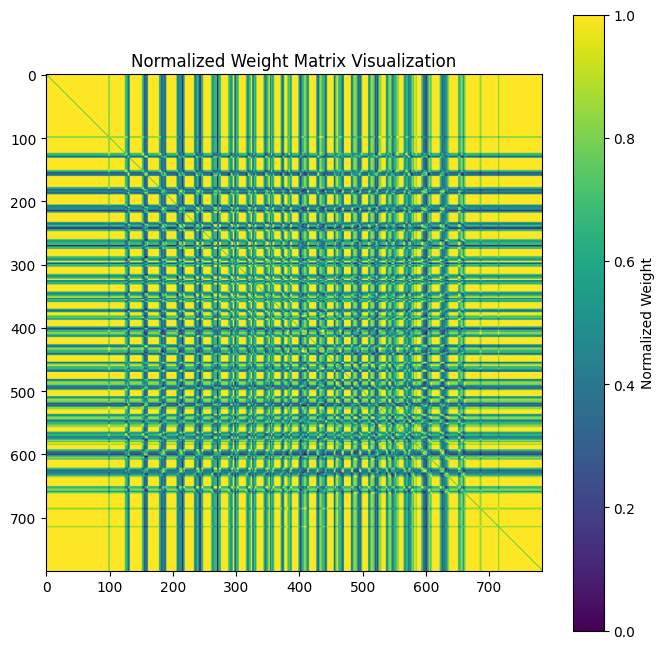

In [30]:
W_norm = (W - W.min()) / (W.max() - W.min())

# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(W_norm, cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

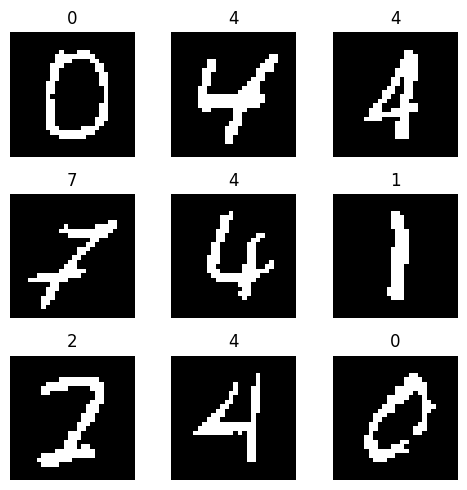

In [16]:
# Get a batch of images
images, labels = next(iter(train_loader))

# Function to show a grid of images
def show_image_grid(images, labels, nrow=3, ncol=3):
    fig, axes = plt.subplots(nrow, ncol, figsize=(5, 5))
    axes = axes.flatten()
    
    for img, ax, label in zip(images[:nrow * ncol], axes, labels[:nrow * ncol]):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'{label.item()}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the grid
show_image_grid(images, labels)